In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# 1 - Business Problem
Forecast the airlines data set.
Prepare a document for each model explaining how many dummy variables you have created and RMSE value for each model. 
Finally which model you will use for Forecasting



# 2 - Data collection and description

In [2]:
data = pd.read_excel("C:/Users/SONY/Downloads/Airlines+Data.xlsx")
data

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [3]:
data.shape

(96, 2)

In [4]:
data['Month']=pd.to_datetime(data['Month'], infer_datetime_format=True)
data=data.set_index(['Month'])

In [ ]:
data=

In [5]:
data.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


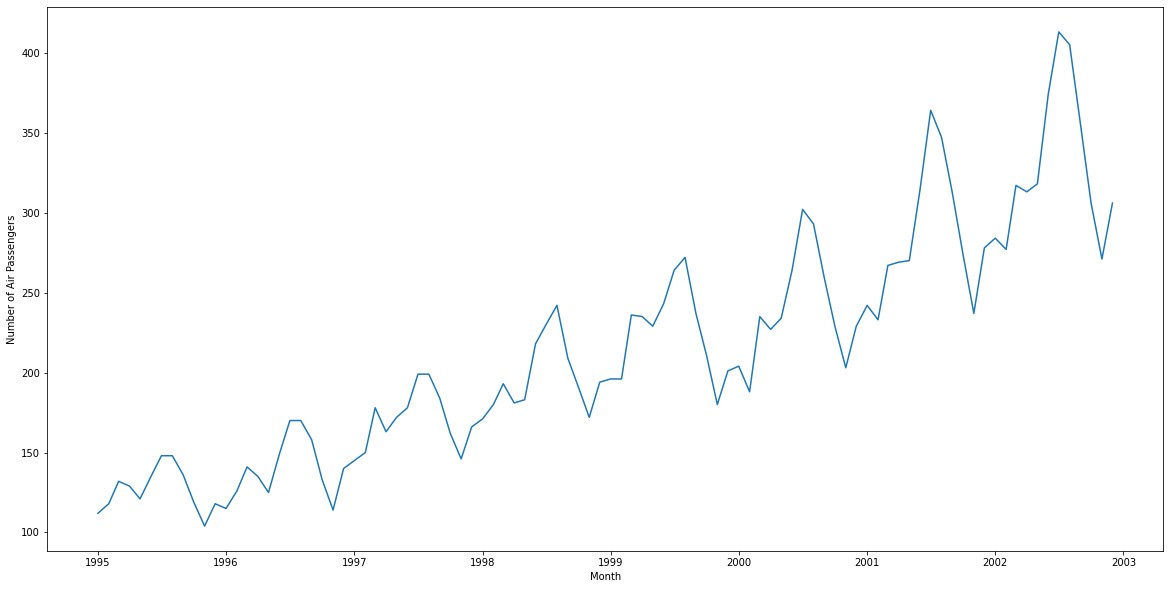

In [6]:
plt.figure(figsize=(20,10))
plt.xlabel("Month")
plt.ylabel("Number of Air Passengers")
plt.plot(data)

In [7]:
rolmean=data.rolling(window=12).mean()
rolstd=data.rolling(window=12).std()
print(rolmean.head(15))
print(rolstd.head(15))

            Passengers
Month                 
1995-01-01         NaN
1995-02-01         NaN
1995-03-01         NaN
1995-04-01         NaN
1995-05-01         NaN
1995-06-01         NaN
1995-07-01         NaN
1995-08-01         NaN
1995-09-01         NaN
1995-10-01         NaN
1995-11-01         NaN
1995-12-01  126.666667
1996-01-01  126.916667
1996-02-01  127.583333
1996-03-01  128.333333
            Passengers
Month                 
1995-01-01         NaN
1995-02-01         NaN
1995-03-01         NaN
1995-04-01         NaN
1995-05-01         NaN
1995-06-01         NaN
1995-07-01         NaN
1995-08-01         NaN
1995-09-01         NaN
1995-10-01         NaN
1995-11-01         NaN
1995-12-01   13.720147
1996-01-01   13.453342
1996-02-01   13.166475
1996-03-01   13.686977


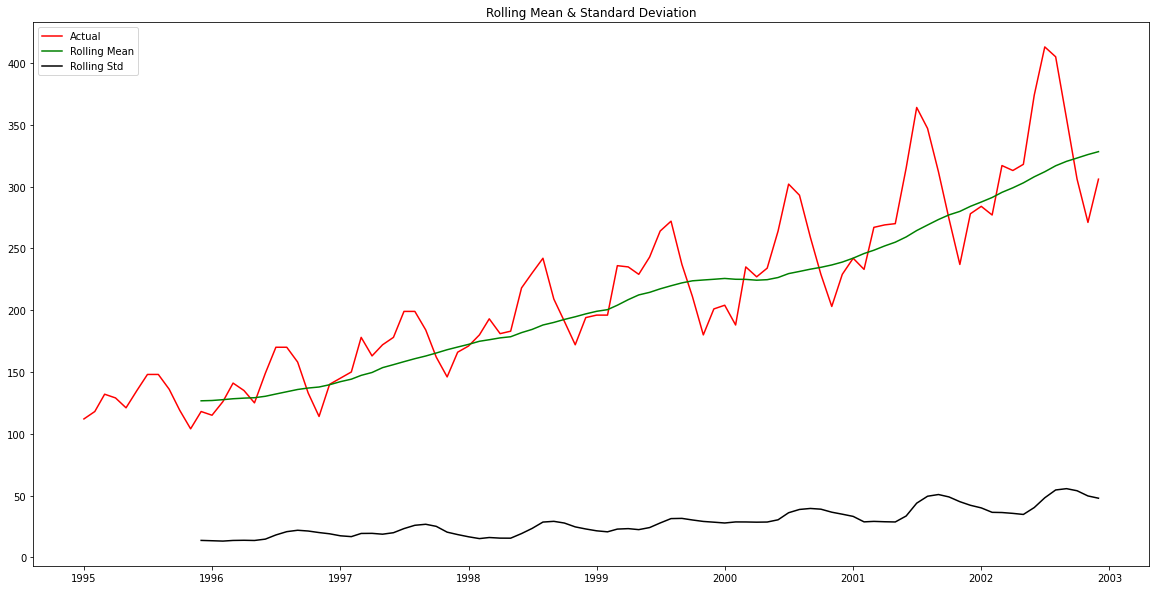

In [8]:
plt.figure(figsize=(20,10))
actual=plt.plot(data, color='red', label='Actual')
mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
std_6=plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)


In [9]:
from statsmodels.tsa.stattools import adfuller
print('Dickey-Fuller Test: ')
dftest=adfuller(data['Passengers'], autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Dickey-Fuller Test: 
Test Statistic           1.340248
p-value                  0.996825
Lags Used               12.000000
No. of Obs              83.000000
Critical Value (1%)     -3.511712
Critical Value (5%)     -2.897048
Critical Value (10%)    -2.585713
dtype: float64


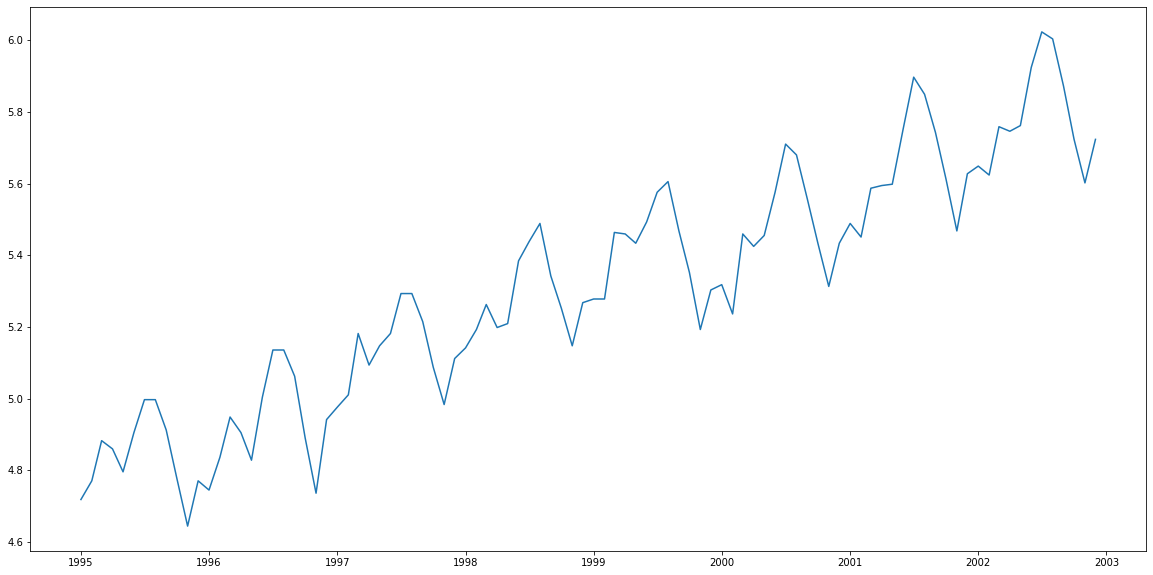

In [10]:
plt.figure(figsize=(20,10))
data_log=np.log(data)
plt.plot(data_log)

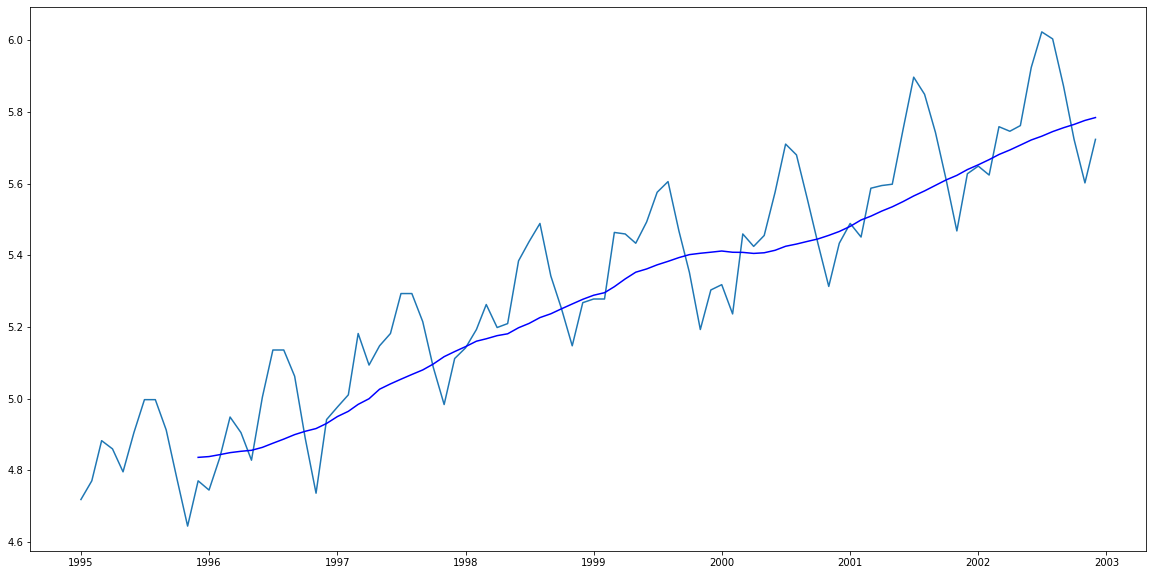

In [11]:
plt.figure(figsize=(20,10))
MAvg=data_log.rolling(window=12).mean()
MStd=data_log.rolling(window=12).std()
plt.plot(data_log)
plt.plot(MAvg, color='blue')

In [12]:
data_log_diff=data_log-MAvg
data_log_diff.head(12)

,Passengers
Month,
1995-01-01,NaN
1995-02-01,NaN
1995-03-01,NaN
1995-04-01,NaN
1995-05-01,NaN
1995-06-01,NaN
1995-07-01,NaN
1995-08-01,NaN
1995-09-01,NaN


In [13]:
data_log_diff=data_log_diff.dropna()
data_log_diff.head()

,Passengers
Month,
1995-12-01,-0.065494
1996-01-01,-0.093449
1996-02-01,-0.007566
1996-03-01,0.099416
1996-04-01,0.052142


In [14]:
def stationarity(timeseries):
    
    rolmean=timeseries.rolling(window=12).mean()
    rolstd=timeseries.rolling(window=12).std()
    
    plt.figure(figsize=(20,10))
    actual=plt.plot(timeseries, color='red', label='Actual')
    mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
    std_6=plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print('Dickey-Fuller Test: ')
    dftest=adfuller(timeseries['Passengers'], autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

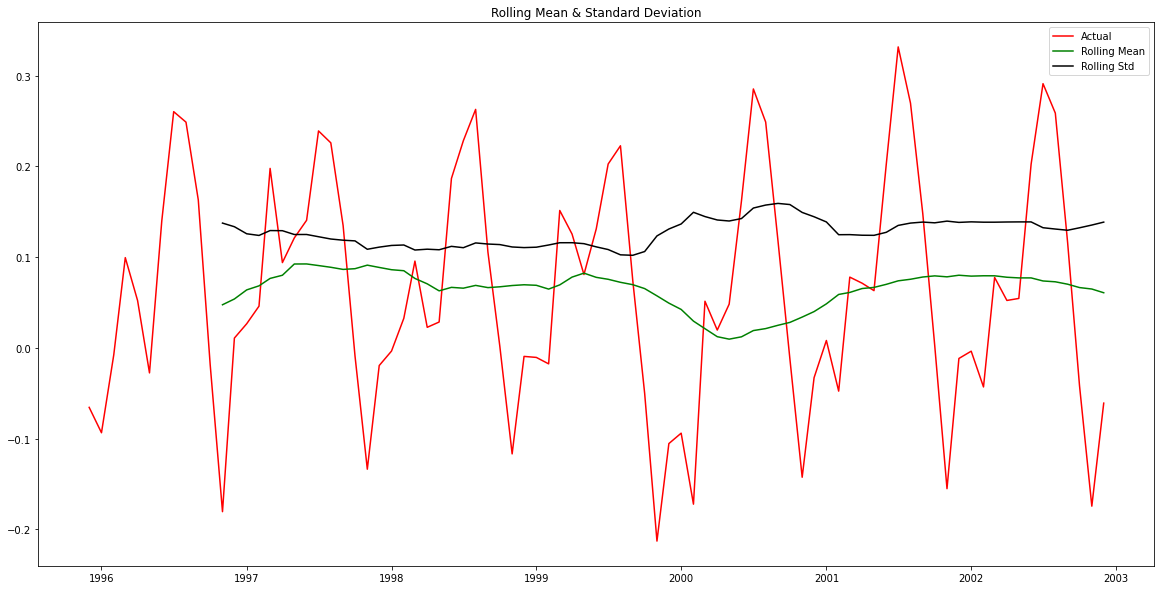

Dickey-Fuller Test: 
Test Statistic          -1.910930
p-value                  0.326937
Lags Used               12.000000
No. of Obs              72.000000
Critical Value (1%)     -3.524624
Critical Value (5%)     -2.902607
Critical Value (10%)    -2.588679
dtype: float64


In [15]:
stationarity(data_log_diff)

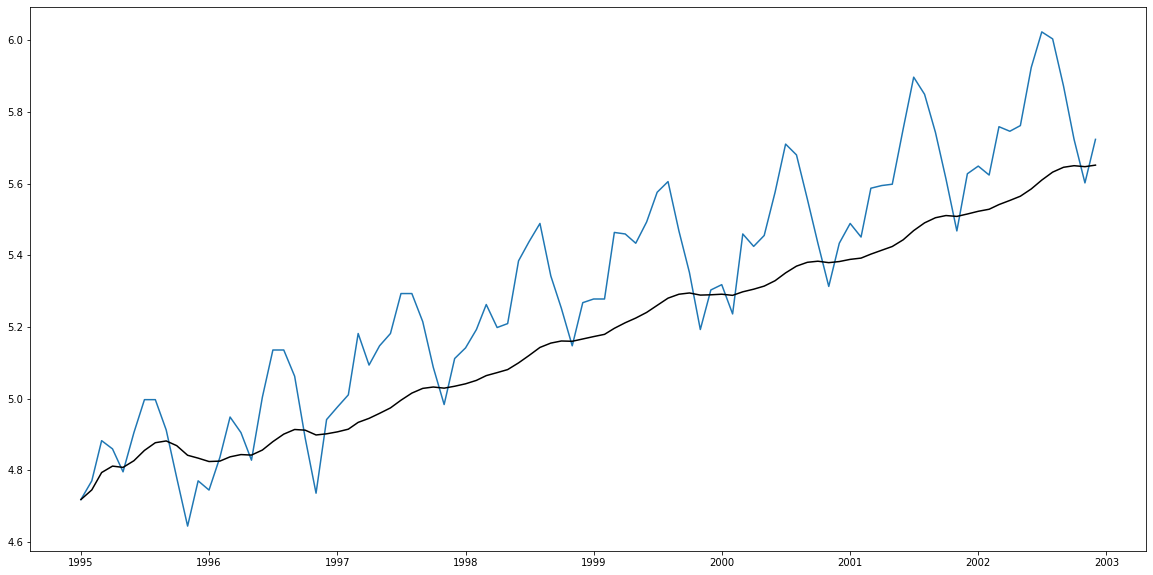

In [16]:
plt.figure(figsize=(20,10))
exp_data=data_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(data_log)
plt.plot(exp_data, color='black')

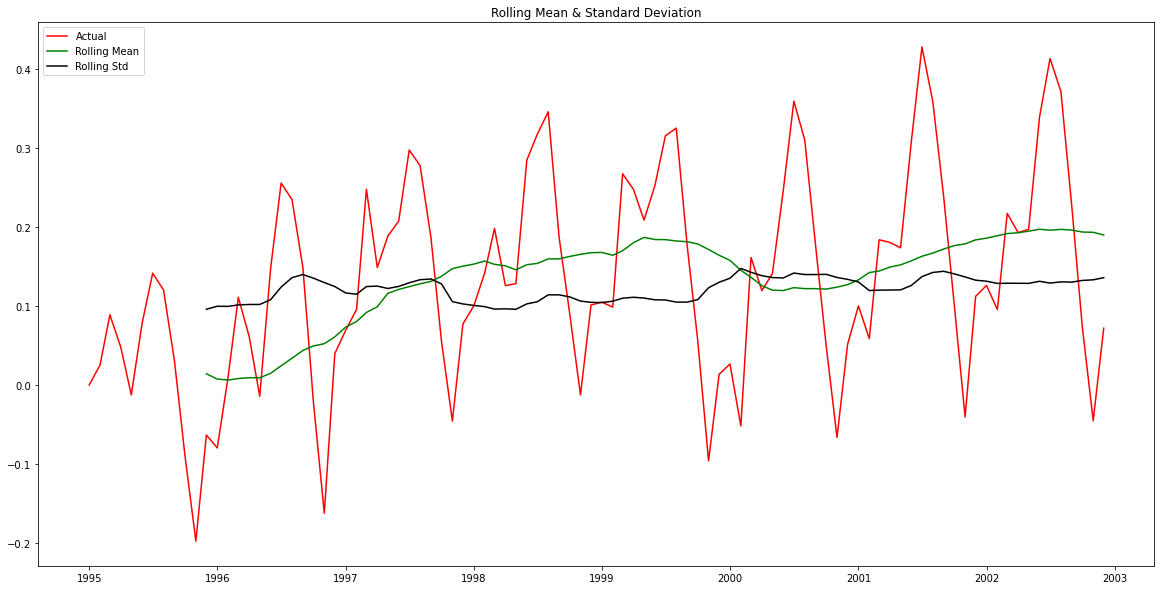

Dickey-Fuller Test: 
Test Statistic          -2.835036
p-value                  0.053441
Lags Used               12.000000
No. of Obs              83.000000
Critical Value (1%)     -3.511712
Critical Value (5%)     -2.897048
Critical Value (10%)    -2.585713
dtype: float64


In [17]:
exp_data_diff=data_log-exp_data
stationarity(exp_data_diff)


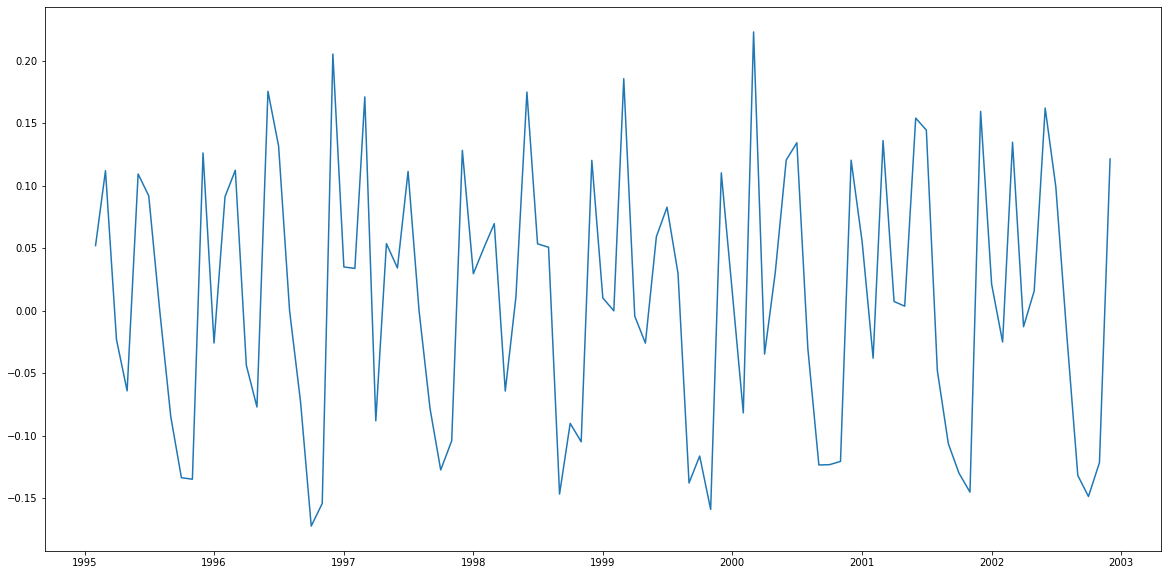

In [18]:
plt.figure(figsize=(20,10))
data_shift=data_log-data_log.shift()
plt.plot(data_shift)

Text(0.5, 1.0, 'Autocorrelation Function')

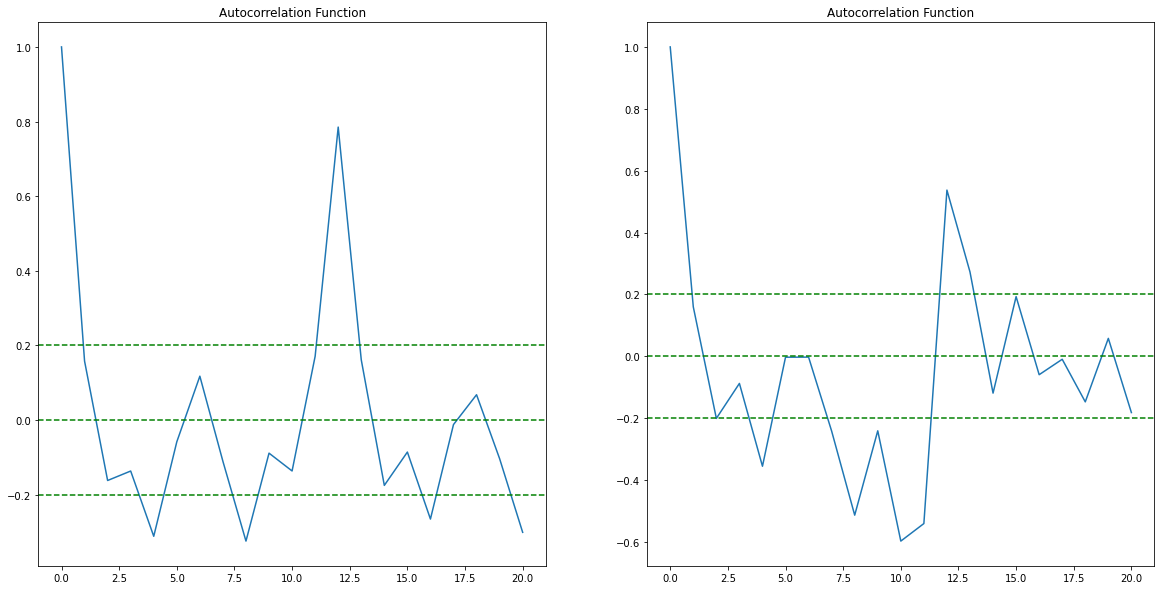

In [23]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf=acf(data_shift, nlags=20)
lag_pacf=pacf(data_shift, nlags=20, method='ols')

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.title('Autocorrelation Function')

# ARIMA model

In [51]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [52]:
X = data['Passengers'].values

In [58]:
size = int(len(X) * 0.66)

In [59]:
train, test = X[0:size], X[size:len(X)]

In [60]:
history = [x for x in train]

In [61]:
predictions = list()

In [70]:
model = sm.tsa.arima.ARIMA(history,order=(5,1,0))

C:\Users\SONY\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SONY\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SONY\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


plotting ARIMA model


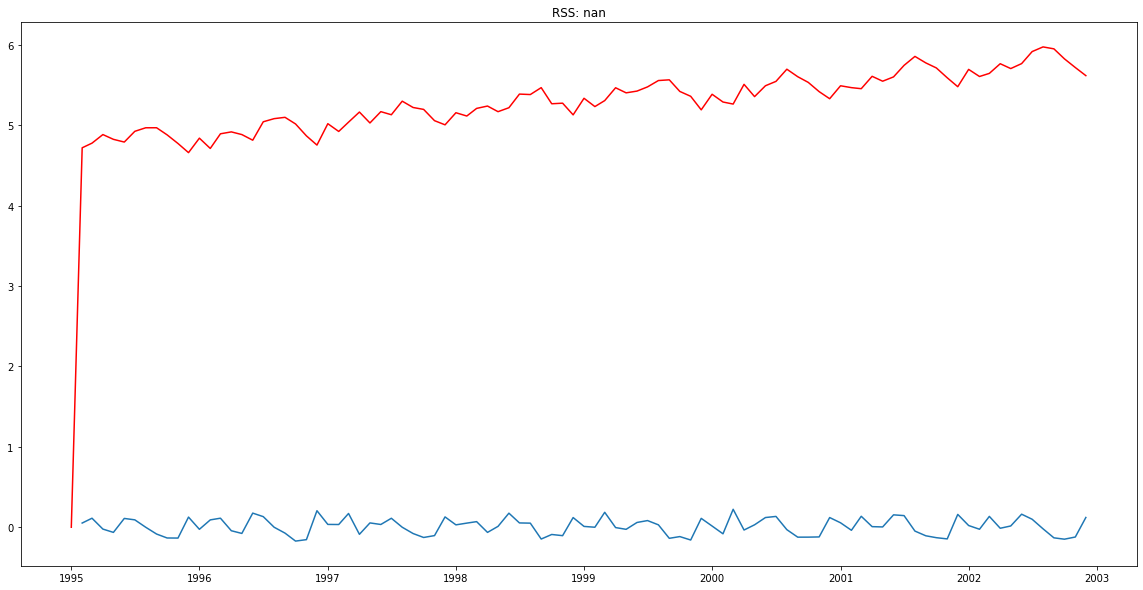

In [73]:
plt.figure(figsize=(20,10))
model=sm.tsa.arima.ARIMA(data_log, order=(2,1,2))
results=model.fit()
plt.plot(data_shift)
plt.plot(results.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results.fittedvalues-data_shift['Passengers'])**2))
print('plotting ARIMA model')

In [74]:
predictions=pd.Series(results.fittedvalues, copy=True)
print(predictions.head())

Month
1995-01-01    0.000000
1995-02-01    4.718499
1995-03-01    4.776291
1995-04-01    4.882910
1995-05-01    4.823606
dtype: float64


In [75]:
predictions_cum_sum=predictions.cumsum()
print(predictions_cum_sum.head())

Month
1995-01-01     0.000000
1995-02-01     4.718499
1995-03-01     9.494790
1995-04-01    14.377700
1995-05-01    19.201306
dtype: float64


In [76]:
predictions_cum_sum=predictions.cumsum()
print(predictions_cum_sum.head())

Month
1995-01-01     0.000000
1995-02-01     4.718499
1995-03-01     9.494790
1995-04-01    14.377700
1995-05-01    19.201306
dtype: float64


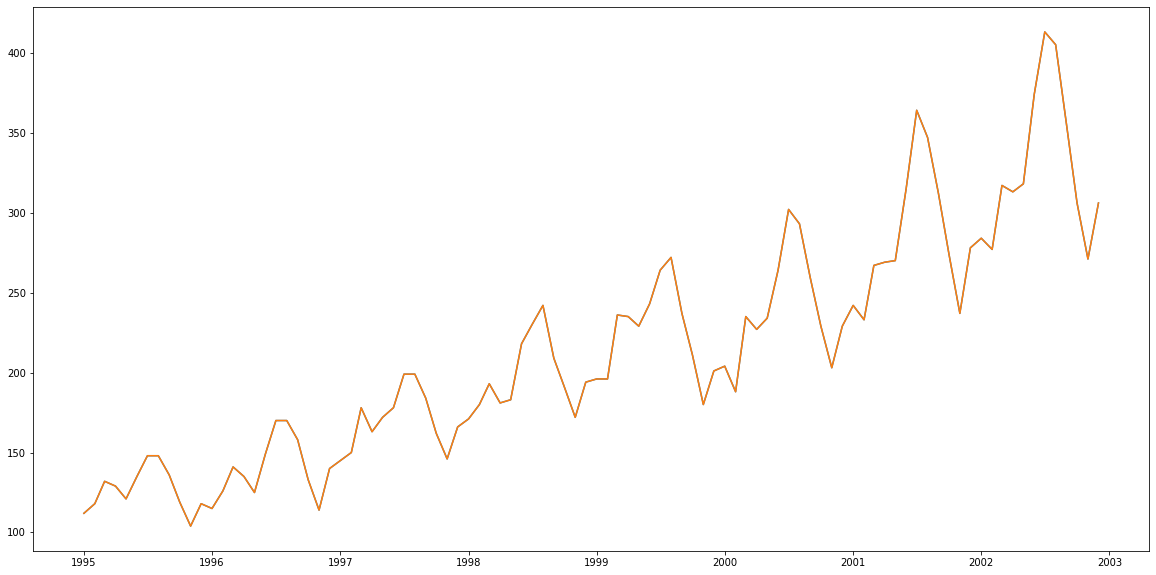

In [77]:
predictions_ARIMA=np.exp(pd.Series(data_log['Passengers']))
plt.figure(figsize=(20,10))
plt.plot(data)
plt.plot(predictions_ARIMA)

In [81]:
predictions=pd.Series(results.fittedvalues, copy=True)
print(predictions.head())

Month
1995-01-01    0.000000
1995-02-01    4.718499
1995-03-01    4.776291
1995-04-01    4.882910
1995-05-01    4.823606
dtype: float64


In [83]:
predictions_cum_sum=predictions.cumsum()
print(predictions_cum_sum.head())

Month
1995-01-01     0.000000
1995-02-01     4.718499
1995-03-01     9.494790
1995-04-01    14.377700
1995-05-01    19.201306
dtype: float64


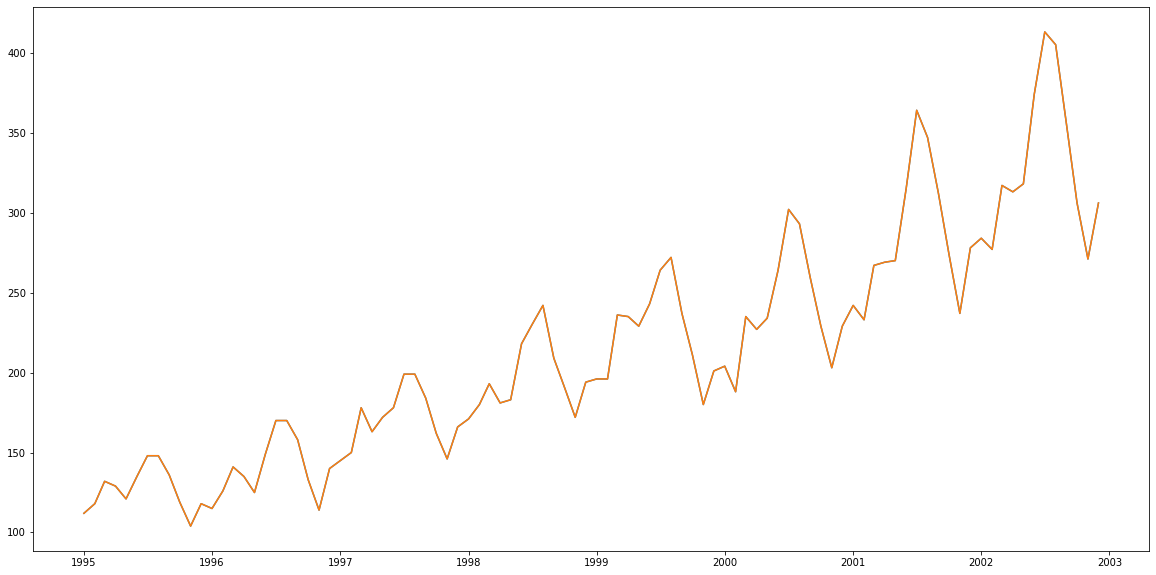

In [86]:
predictions_ARIMA=np.exp(pd.Series(data_log['Passengers']))
plt.figure(figsize=(20,10))
plt.plot(data)
plt.plot(predictions_ARIMA)

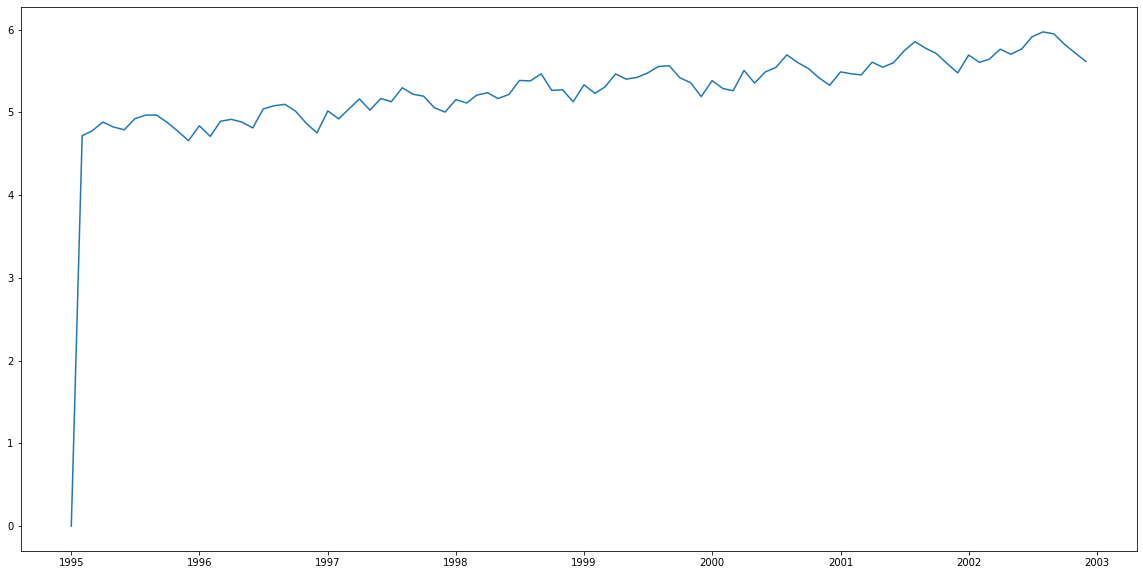

In [103]:
rcParams['figure.figsize']=20,10
x=results.forecast(steps=120)
plt.plot(predictions)


In [104]:
results.forecast(steps=120)

2003-01-01    5.785476
2003-02-01    5.763411
2003-03-01    5.768747
2003-04-01    5.766116
2003-05-01    5.766366
                ...   
2012-08-01    5.765644
2012-09-01    5.765644
2012-10-01    5.765644
2012-11-01    5.765644
2012-12-01    5.765644
Freq: MS, Name: predicted_mean, Length: 120, dtype: float64